In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
train_df = pd.read_csv('train.csv')
features_df = pd.read_csv('features.csv')

# Step 3: Convert 'Date' column to datetime
train_df['Date'] = pd.to_datetime(train_df['Date'])
features_df['Date'] = pd.to_datetime(features_df['Date'])

# Step 4: Merge the two datasets on Store, Date, and IsHoliday
df = pd.merge(train_df, features_df, on=['Store', 'Date', 'IsHoliday'])


print(df.head())

   Store  Dept       Date  Weekly_Sales  IsHoliday  Temperature  Fuel_Price  \
0      1     1 2010-02-05      24924.50      False        42.31       2.572   
1      1     1 2010-02-12      46039.49       True        38.51       2.548   
2      1     1 2010-02-19      41595.55      False        39.93       2.514   
3      1     1 2010-02-26      19403.54      False        46.63       2.561   
4      1     1 2010-03-05      21827.90      False        46.50       2.625   

   MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
0        NaN        NaN        NaN        NaN        NaN  211.096358   
1        NaN        NaN        NaN        NaN        NaN  211.242170   
2        NaN        NaN        NaN        NaN        NaN  211.289143   
3        NaN        NaN        NaN        NaN        NaN  211.319643   
4        NaN        NaN        NaN        NaN        NaN  211.350143   

   Unemployment  
0         8.106  
1         8.106  
2         8.106  
3         8.106  
4 

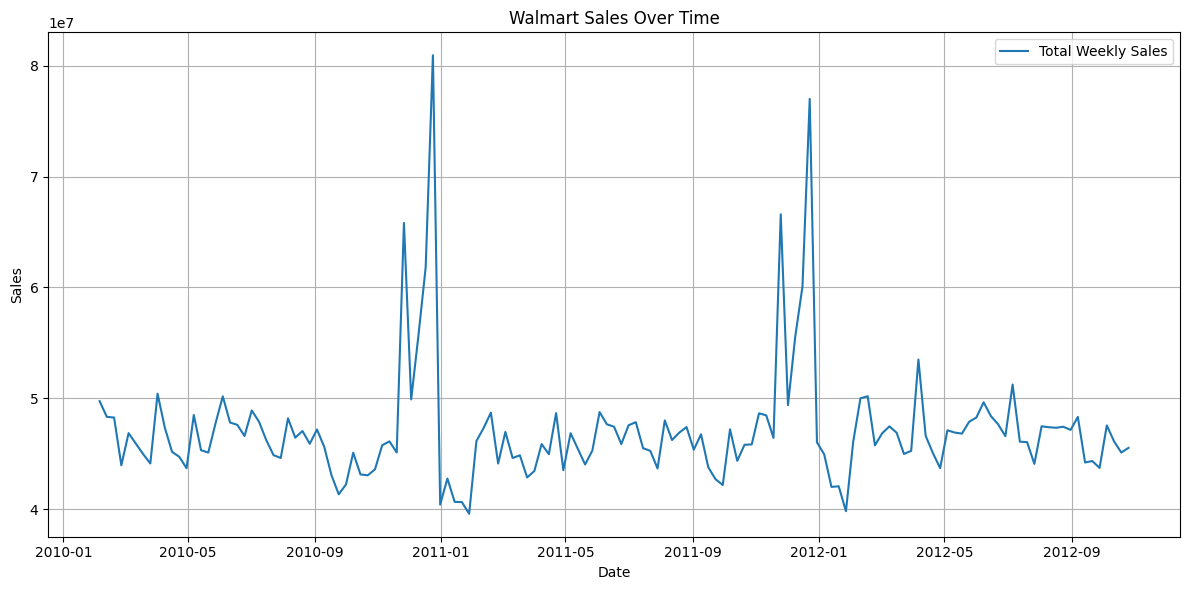

In [5]:
#Totaly weekly sales Trend:
df_grouped = df.groupby('Date')['Weekly_Sales'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(df_grouped['Date'], df_grouped['Weekly_Sales'], label='Total Weekly Sales')
plt.title('Walmart Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()


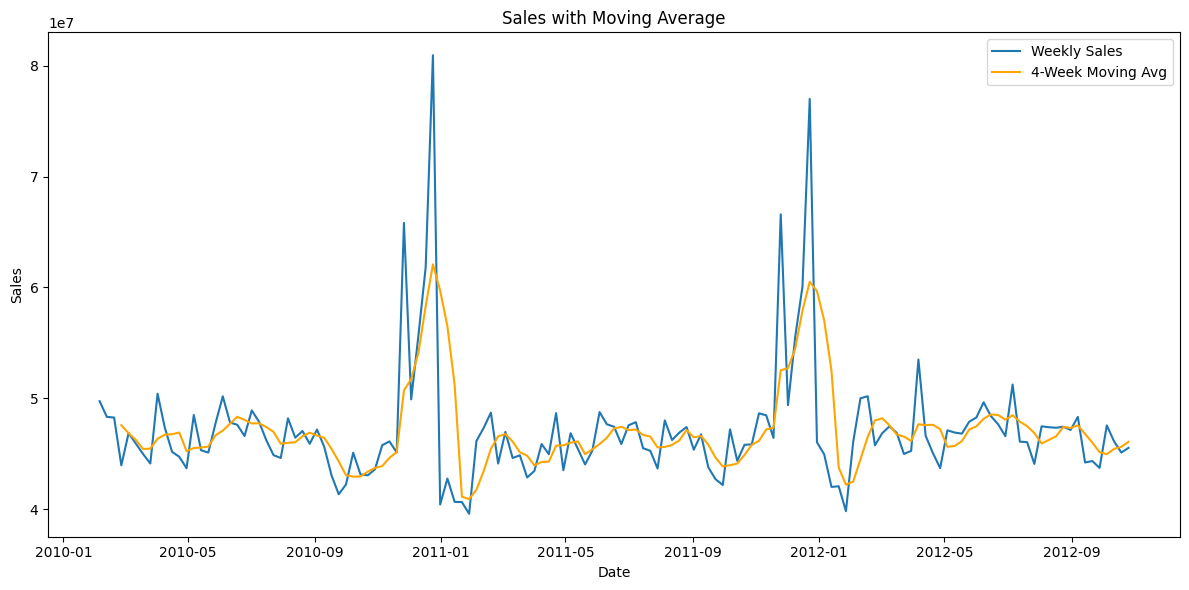

In [6]:
#Moving Average:
df_grouped['4_Week_MA'] = df_grouped['Weekly_Sales'].rolling(window=4).mean()

plt.figure(figsize=(12, 6))
plt.plot(df_grouped['Date'], df_grouped['Weekly_Sales'], label='Weekly Sales')
plt.plot(df_grouped['Date'], df_grouped['4_Week_MA'], label='4-Week Moving Avg', color='orange')
plt.title('Sales with Moving Average')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.tight_layout()
plt.show()


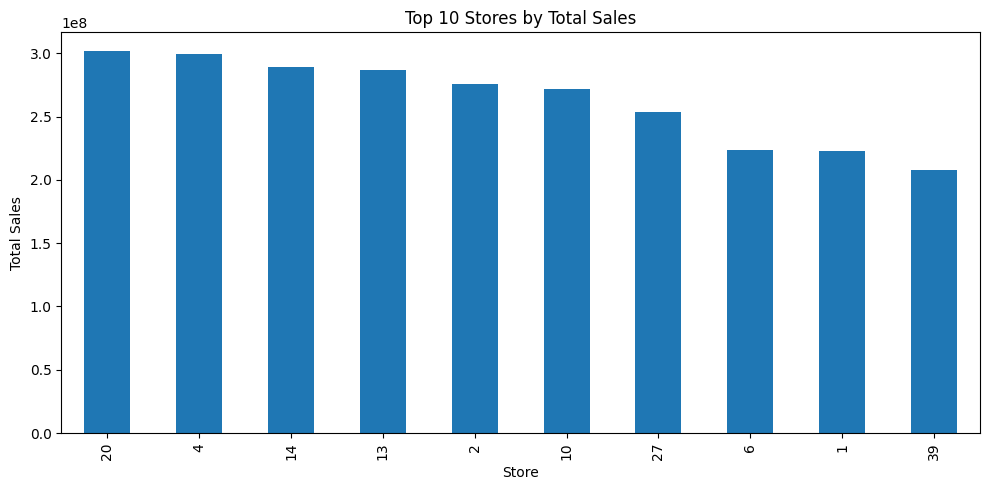

In [7]:
#Sales By Store:
store_sales = df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False).head(10)

store_sales.plot(kind='bar', figsize=(10, 5), title='Top 10 Stores by Total Sales')
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()
